In [1]:
### Logistic Regression

#### Difference Between Linear and Logistic Regression

#### Explanation : 
    1. Linear Regression using for the continuouns data or veriable.
    2. Logistic Regression use for to get the binary classification.

### Data : Customer churn with Logistic Regression
    1. A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

### ODDS RATIO
    Odds ration: is exactly what it says, it is a ratio of two odds.
    odds ratio generate from the basic probability function. like Probability >> odd function >> odds ration.
    
    probability: p(Head) = (outcomes of head / total number of outcomes ) or (number of success/total number of outcomes).
                  p(toss a coin : 1 Head)  = (1/2) = 0.5 = p(H)
    
    ODD function :  p = p(occuring)/p(Not occuring) or ratio of (something happening/ ratio of something not happening)
    
    ODDS ration :  (p1/(1-p1))/(p0/(1-p0))
                    
                    Muted gene YES :  cancer YES/No : (p1/(1-p1)) = 23/117
                    Muted gene No  :  cancer YES/No : (p0/(1-p0)) = 6/210
                    
                    ODDS ration is  :  (23/117)/(6/210) = 6.88
                    
    Note : The Odds Ratio takes values from zero to positive infinity. 
        If it equals 1, it means that the exposure and the event are not associated, 
        If it is less than 1, it means that the exposure prevents the event, 
        If it is bigger than 1, it means that the exposure is the cause of the event.
        
    An odds ratio (OR) is a "measure of association" between a certain property A and a second property B in a population.   Specifically, it tells you how the presence or absence of property A has an effect on the presence or absence of property B. 
                  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\RAJAT SAHU\Data_Science\Project\LogisticReg\ChurnData.csv')

In [4]:
data.shape

(200, 28)

In [5]:
data.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [6]:
# there is no null values
data.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [7]:
for col in data.columns:
    print("---------")
    print('Number of unique values in the column :'+str(col)+'', data[''+str(col)+''].unique())
    print('')

---------
Number of unique values in the column :tenure [11. 33. 23. 38.  7. 68. 42.  9. 35. 49. 56. 47. 69. 16.  4. 27. 52. 64.
 12. 13. 45.  3. 53. 17. 59. 57. 29. 22. 18. 65. 39. 28. 46. 43. 21. 50.
 37. 71. 58. 36. 26.  1. 15.  5. 32. 14. 67. 60. 70.  6. 61. 20. 72. 54.
 10. 25. 30.  8. 55. 51. 62. 34. 44. 19. 24. 66. 63. 31.]

---------
Number of unique values in the column :age [33. 30. 35. 52. 40. 21. 50. 51. 27. 61. 25. 24. 54. 22. 37. 42. 43. 47.
 26. 55. 34. 69. 65. 29. 57. 66. 56. 58. 39. 64. 36. 60. 45. 76. 31. 59.
 46. 62. 44. 23. 32. 63. 48. 41. 28. 75. 53. 19. 20. 38. 49.]

---------
Number of unique values in the column :address [ 7. 12.  9.  5. 14. 17.  1. 26. 27. 28. 16. 11.  3.  4.  2. 23. 13.  6.
 18. 25. 43. 33. 10. 34. 15. 32. 38. 21. 20.  0. 22. 19. 30.  8. 29. 48.
 37. 35. 31. 24.]

---------
Number of unique values in the column :income [ 136.   33.   30.   76.   80.  120.   37.   17.  140.   63.   49.  127.
  438.  161.   53.   19.   41.   31.   36.   24.   25

In [8]:
data.churn.value_counts()

0.0    142
1.0     58
Name: churn, dtype: int64

In [9]:
data.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [10]:
data = data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]

In [11]:
data = data.astype('int')

In [12]:
data.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.shape

(200, 10)

In [14]:
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11,33,7,136,5,5,0,1,1,1
1,33,33,12,33,2,0,0,0,0,1
2,23,30,9,30,1,2,0,0,0,0
3,38,35,5,76,2,10,1,1,1,0
4,7,35,14,80,2,15,0,1,0,0


In [15]:
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11,33,7,136,5,5,0,1,1,1
1,33,33,12,33,2,0,0,0,0,1
2,23,30,9,30,1,2,0,0,0,0
3,38,35,5,76,2,10,1,1,1,0
4,7,35,14,80,2,15,0,1,0,0


<AxesSubplot:>

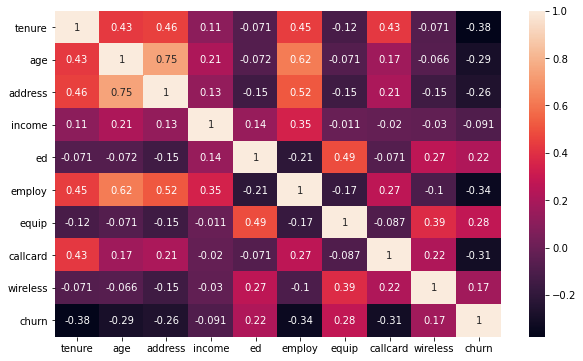

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data.drop('churn',axis=1)

In [18]:
vif_data = pd.DataFrame()
vif_data['Columns'] = X.columns
vif_data['VIF'] =  [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [19]:
vif_data

,Columns,VIF
0,tenure,5.853918
1,age,15.878061
2,address,4.986799
3,income,1.647639
4,ed,7.038968
5,employ,4.748750
6,equip,2.589353
7,callcard,4.440676
8,wireless,1.884793


In [20]:
### Ordinary Least squared error :  Backward method

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
data.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [23]:
olsmodel = smf.ols(formula='churn~tenure+employ+equip',data=data).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     18.60
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           1.17e-10
Time:                        17:36:06   Log-Likelihood:                -100.70
No. Observations:                 200   AIC:                             209.4
Df Residuals:                     196   BIC:                             222.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5035      0.065      7.721      0.000       0.375       0.632
tenure        -0.0057      0.001     -3.858      0.000      -0.009      -0.003
employ        -0.0091      0.004     -2.529      0.012      -0.016      -0.002
equip          0.1947      0.059      3.310      0.001       0.079       0.311
==============================================================================
Omnibus:                       32.000   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.005
Skew:                           0.520   Prob(JB):                     0.000335
Kurtosis:                       2.083   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score

X = data[['tenure','employ','equip']]
y = data['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

Logreg = LogisticRegression()
Logreg.fit(X_train,y_train)
y_pred = Logreg.predict(X_test)
accuracy_score(y_test,y_pred)

0.775

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

TP = cm[0,0]
TN = cm[0,1]
FP = cm[1,0]
FN = cm[1,1]
print('TP:',TP ,'\nTN:',TN,'\nFP:',FP,'\nFN:', FN)

print('Presicion Score is: ',precision_score(y_test,y_pred))
print('Recall score is:',recall_score(y_test,y_pred))
print('Accuaracy Score is:',accuracy_score(y_test,y_pred))

TP: 26 
TN: 5 
FP: 4 
FN: 5
Presicion Score is:  0.5
Recall score is: 0.5555555555555556
Accuaracy Score is: 0.775


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score,confusion_matrix

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=34)

Logreg = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
Logreg.fit(X_train,y_train)
y_pred = Logreg.predict(X_test)
print('Model Accuracy : ',accuracy_score(y_test,y_pred)*100,'%')
confusion_matrix(y_test,y_pred)

Model Accuracy :  70.0 %


array([[34,  4],
       [11,  1]], dtype=int64)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import KFold,cross_val_score

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

#Prepare the cross validation procedure
cv = KFold(n_splits=10,random_state=1,shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model,X,y,cv=cv,scoring='accuracy',n_jobs=-1)
print('Number of cross valdation : ', scores)
print('K-fold technique mean score is  : ',np.mean(scores)*100,'%')

#without kFold
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=34)
Logreg = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
Logreg.fit(X_train,y_train)
y_pred = Logreg.predict(X_test)
print('Model Accuracy : ',accuracy_score(y_test,y_pred)*100,'%')
confusion_matrix(y_test,y_pred)

Number of cross valdation :  [0.8  0.9  0.8  0.75 0.6  0.75 0.7  0.8  0.75 0.65]
K-fold technique mean score is  :  75.0 %
Model Accuracy :  70.0 %


array([[34,  4],
       [11,  1]], dtype=int64)

In [71]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0])

In [27]:
for alpha in range(1,11):
    alpha = alpha/10
    Logreg = LogisticRegression(C=alpha)
    Logreg.fit(X_train,y_train)
    y_pred = Logreg.predict(X_test)
    print('System accuracy : ',alpha , ' : ',accuracy_score(y_test,y_pred))

System accuracy :  0.1  :  0.6
System accuracy :  0.2  :  0.64
System accuracy :  0.3  :  0.64
System accuracy :  0.4  :  0.64
System accuracy :  0.5  :  0.64
System accuracy :  0.6  :  0.64
System accuracy :  0.7  :  0.64
System accuracy :  0.8  :  0.66
System accuracy :  0.9  :  0.66
System accuracy :  1.0  :  0.66


In [28]:
for alpha in range(1,110):
    alpha = alpha/10
    Logreg = LogisticRegression(C=alpha)
    Logreg.fit(X_train,y_train)
    y_pred = Logreg.predict(X_test)
    print('System accuracy : ',alpha , ' : ',accuracy_score(y_test,y_pred))

System accuracy :  0.1  :  0.6
System accuracy :  0.2  :  0.64
System accuracy :  0.3  :  0.64
System accuracy :  0.4  :  0.64
System accuracy :  0.5  :  0.64
System accuracy :  0.6  :  0.64
System accuracy :  0.7  :  0.64
System accuracy :  0.8  :  0.66
System accuracy :  0.9  :  0.66
System accuracy :  1.0  :  0.66
System accuracy :  1.1  :  0.66
System accuracy :  1.2  :  0.66
System accuracy :  1.3  :  0.66
System accuracy :  1.4  :  0.66
System accuracy :  1.5  :  0.66
System accuracy :  1.6  :  0.68
System accuracy :  1.7  :  0.66
System accuracy :  1.8  :  0.66
System accuracy :  1.9  :  0.66
System accuracy :  2.0  :  0.66
System accuracy :  2.1  :  0.66
System accuracy :  2.2  :  0.66
System accuracy :  2.3  :  0.66
System accuracy :  2.4  :  0.66
System accuracy :  2.5  :  0.68
System accuracy :  2.6  :  0.68
System accuracy :  2.7  :  0.66
System accuracy :  2.8  :  0.66
System accuracy :  2.9  :  0.66
System accuracy :  3.0  :  0.68
System accuracy :  3.1  :  0.66
System ac

In [29]:
# Y_prediction with the higher accuracy
Logreg = LogisticRegression(C=10.9)
Logreg.fit(X_train,y_train)
y_pred = Logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0])

In [30]:
y.value_counts()
# somthing like a inbalance data set or baised thats why i am using SMOTE process  

0    142
1     58
Name: churn, dtype: int64

In [31]:
#!pip install imblearn

### Inbalance Data sampling 

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()  #SMOTE : Synthetic minority oversampling technique (inbalance Data Handling)

In [33]:
X_train_smote,y_train_res = sm.fit_resample(X,y)

In [34]:
print(X_train_smote.shape,y_train_res.shape)

(284, 9) (284,)


In [35]:
Logreg.fit(X_train_smote,y_train_res)
y_prod = Logreg.predict(X_test)

In [36]:
accuracy_score(y_test,y_prod)

0.72

In [37]:
y_train_res.value_counts()
# you can see data values are balanced.

1    142
0    142
Name: churn, dtype: int64

In [38]:
X_train_smote.head(2)

,tenure,age,address,income,ed,employ,equip,callcard,wireless
0,11,33,7,136,5,5,0,1,1
1,33,33,12,33,2,0,0,0,0


In [39]:
pen = ['l2']
for alpha in pen:
    Logreg = LogisticRegression(penalty=alpha)
    Logreg.fit(X_train,y_train)
    y_pred = Logreg.predict(X_test)
    print('System accuracy : ',alpha , ' : ',accuracy_score(y_test,y_pred))

System accuracy :  l2  :  0.66


### K-fold cross-validation
    The k-fold cross-validation method evaluates the model performance on different subset of the training data and then calculate the average prediction error rate. The algorithm is as follow:

    Randomly split the data set into k-subsets (or k-fold) (for example 5 subsets)
    Reserve one subset and train the model on all other subsets
    Test the model on the reserved subset and record the prediction error
    Repeat this process until each of the k subsets has served as the test set.
    Compute the average of the k recorded errors. This is called the cross-validation error serving as the performance metric for the model.
    K-fold cross-validation (CV) is a robust method for estimating the accuracy of a model.

### What is Regularization?
     Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients. In simple terms, it reduces parameters and shrinks (simplifies) the model. This more streamlined, more parsimonious model will likely perform better at predictions. Regularization adds penalties to more complex models and then sorts potential models from least overfit to greatest; The model with the lowest “overfitting” score is usually the best choice for predictive power.

### Why is Regularization Necessary?
    Regularization is necessary because least squares regression methods, where the residual sum of squares is minimized, can be unstable. This is especially true if there is multicollinearity in the model. 

#### Penalty : This penalty causes the regression coefficients to shrink toward zero. This is why penalized regression methods are also known as shrinkage or regularization methods. 

### L1 penalty 
    L1 regularization: It adds an L1 penalty that is equal to the absolute value of the magnitude of coefficient, or simply restricting the size of coefficients. For example, Lasso regression implements this method. 
### L2 Penalty
    L2 Regularization: It adds an L2 penalty which is equal to the square of the magnitude of coefficients.

### Penalty Terms
    Regularization works by biasing data towards particular values (such as small values near zero). The bias is achieved by adding a tuning parameter to encourage those values:

    L1 regularization: adds an L1 penalty equal to the absolute value of the magnitude of coefficients. In other words, it limits the size of the coefficients. L1 can yield sparse models (i.e. models with few coefficients); Some coefficients can become zero and eliminated. Lasso regression uses this method.
    L2 regularization: adds an L2 penalty equal to the square of the magnitude of coefficients. L2 will not yield sparse models and all coefficients are shrunk by the same factor (none are eliminated). Ridge regression and SVMs use this method.
    Elastic nets: combine L1 & L2 methods, but do add a hyperparameter (see this paper by Zou and Hastie).

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=34)

Logreg = LogisticRegression(C=0.001,penalty='l1',solver='liblinear',max_iter=10000,verbose=2,n_jobs=-1)
Logreg.fit(X_train,y_train)
y_pred = Logreg.predict(X_test)
accuracy_score(y_test,y_pred)

[LibLinear]

0.76

In [77]:
# After remove higher varience data set and use some tunning and hyperprameter we are getting good accua

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix

X = data[['tenure','employ','equip']]
y = data['churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
Logreg = LogisticRegression(C=0.001,penalty='l1',solver='liblinear',max_iter=10000,verbose=2,n_jobs=-1)
Logreg.fit(X_train,y_train)
y_pred = Logreg.predict(X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

[LibLinear]

array([[31,  0],
       [ 9,  0]], dtype=int64)

In [74]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Maximum Likelihood
    One of the most commonly encountered way of thinking in machine learning is the maximum likelihood point of view. This is the concept that when working with a probabilistic model with unknown parameters, the parameters which make the data have the highest probability are the most likely ones.

In [ ]:
### How ??